In [1]:
from math import sin, sqrt, exp, cos
import matplotlib.pyplot as plt
from rk4 import rk_defect_control_perfect_first_step

In [2]:
def create_t_eval(start, end, num_points = 100):
    res = [start]
    h = (end - start)/(num_points - 1)

    for _ in range(num_points - 1):
        res.append(
            res[-1] + h
        )
    return res

In [3]:
def experiment(model, y0, t_span, solution):
    t_eval = create_t_eval(t_span[0], t_span[1])
    tol = 1e-6
    (res, sol, first_deriv, derivs) = rk_defect_control_perfect_first_step(model, t_span, y0[0], tol, solution)
    # (res, sol, first_deriv, derivs) = rk_defect_control_perfect_first_step_smooth(model, t_span, y0[0], tol, solution)
    # (res, sol, first_deriv, derivs) = rk_defect_control_static_alpha(model, t_span, y0[0], tol, solution)
    # print("derivs", derivs)
    print("integration complete")

    # ====================================== figure of rk6 vs rk6_interps vs rk45
    # plt.figure()
    xs = [x[0] for x in res]
    # ys = [x[1] for x in res]
    # plt.plot(xs, ys, label="rk6")

    # plots of where the end of the steps occured to look at the interp
    for this_x in xs:
        plt.axvline(x=this_x) 

    computed_solutions = [sol(x) for x in t_eval]
    plt.plot(t_eval, computed_solutions, label="rk6_interpolated")

    actual_solutions = solution(t_eval)
    plt.plot(t_eval, actual_solutions, label="solution")

    # removed rk45 plt.title("solution vs rk45 vs rk6 vs rk6_interpolated")
    plt.title("solution vs rk6_interpolated")
    plt.xlabel("t")
    plt.ylabel('y')
    plt.legend(loc="upper right")
    plt.show()
    # ====================================== end figure of rk6 vs rk6_interps vs rk45

    # ====================================== global error
    plt.figure()
    error = [(computed_solution - actual_solution) for (computed_solution, actual_solution) in zip(computed_solutions, actual_solutions)]
    for this_x in xs:
        plt.axvline(x=this_x) 
    plt.plot(t_eval, error, label="global error")
    plt.title("global error")
    plt.xlabel("t")
    plt.ylabel("error")
    plt.legend(loc="upper right")
    plt.show()
    # ====================================== end of global error

    # ====================================== figure of satisfying global defect
    actual_f_evals = [model(x, solution([x])[0])[0] for x in t_eval]
    hb_prime_evals = [first_deriv(x) for x in t_eval]
    plt.figure()
    plt.plot(t_eval, actual_f_evals)
    plt.plot(t_eval, hb_prime_evals)
    plt.title(f"first derivative for tol={tol}")
    plt.show()

    defects = [abs(actual_f_eval - hb_prime_eval) for (actual_f_eval, hb_prime_eval) in zip(actual_f_evals, hb_prime_evals)]
    plt.figure()
    plt.plot(t_eval, defects)
    plt.title(f"global defect for tol={tol}")
    plt.show()
    
    # ====================================== end figure of satisfying global defect

    minimum_step_size = 0.01
    defects_small_steps = []
    plt.figure()
    for (x_i, x_i_plus_1, hb) in derivs:
        num_points = 100
        pts_to_sample = create_t_eval(x_i, x_i_plus_1, num_points)
        defects = []
        for pt in pts_to_sample:
            y = solution([pt])[0]
            f_eval  = model(pt, y)[0]
            hb_prime_eval = hb.prime(pt)
            defects.append( abs(hb_prime_eval - f_eval) )
        maximum_defect = max(defects)
        # minimum_defect = min(defects)
        # plot_vals = [(defect - minimum_defect) / (maximum_defect - minimum_defect) for defect in defects]
        plot_vals = [ defect/ maximum_defect for defect in defects]
        #plt.plot(xs, defects, label=f"x_{str(x_i_minus_1)}_{str(x_i_plus_1)}")
        x_axis = [i/(num_points - 1) for i in range(num_points)]

        if (x_i_plus_1 - x_i < minimum_step_size):
            defects_small_steps.append([x_axis, plot_vals])
            continue
        plt.plot(x_axis, plot_vals, label=f"x_{str(x_i)}_{str(x_i_plus_1)}")
    plt.title("plot of defects")
    plt.xlabel("x_i to x_i_plus_1")
    plt.ylabel('defect/(max_defect on x_i to x_i_plus_1)')
    # plt.legend()
    plt.show()
    # ====================================== end figure of defect

    # ====================================== defects on small steps
    plt.figure()
    for [x_axis, plot_vals] in defects_small_steps:
        plt.plot(x_axis, plot_vals)
    plt.title("plot of defects on small step sizes")
    plt.xlabel("x_i to x_i_plus_1")
    plt.ylabel('defect/(max_defect on x_i to x_i_plus_1)')
    plt.show()
    
    # ========================================================= end of steps error vs interpolant error
    for (x, y) in res:
        print(abs(y - solution([ x ])[0]))

tolerance= 1e-06
Monitor8
alpha values [0.9999999999999998, 1.0, 0.9999999999999989, 1.0000000000000007, 0.5, 0.5000000000000006]
beta values [0.9999999999999994, 1.0000000000000002, 2.0, 1.999999999999999, 1.0, 1.000000000000001, 1.9999999999999978]
n_steps 25
n_successful_steps 24


Monitor10
alpha values [0.9999999999999989, 1.9999999999999984, 2.0, 2.0000000000000004, 2.0000000000000013, 2.000000000000002, 1.9999999999999978, 1.0, 1.000000000000001, 1.0000000000000022]
beta values [1.9999999999999978, 2.0, 2.0000000000000013, 3.9999999999999956, 2.000000000000002]
n_steps 0
n_successful_steps 0

integration complete


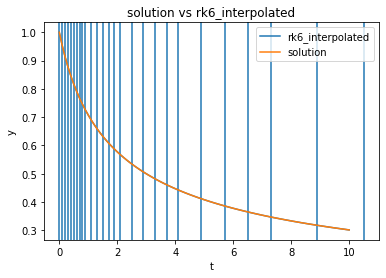

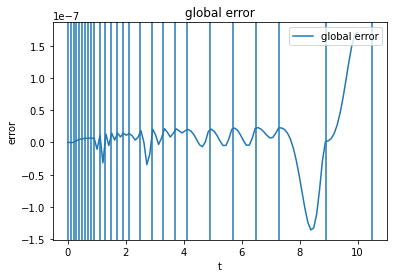

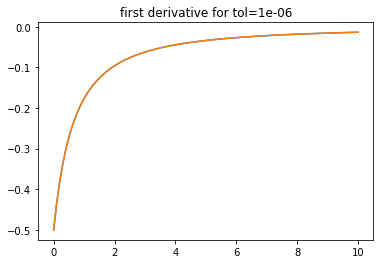

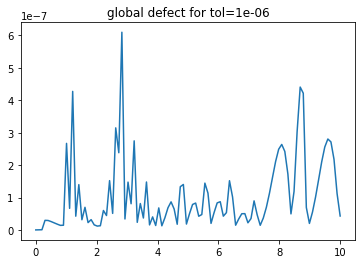

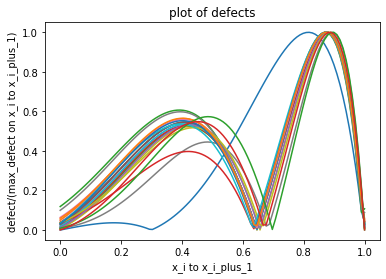

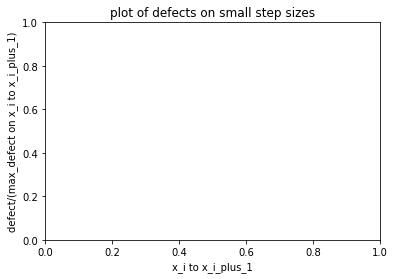

0.0
0.0
0.0
3.0257542027456452e-09
4.828988875438256e-09
5.866911401142261e-09
6.421978282489249e-09
6.670920704721084e-09
6.725770163029665e-09
6.658395612646473e-09
1.1242875741501734e-08
1.355877976561004e-08
1.4535380010727295e-08
1.473846256150324e-08
1.4504484724398026e-08
1.4032521922224817e-08
1.8893114517304355e-08
2.123731779324345e-08
2.1884027201490852e-08
2.1560756402472236e-08
2.073211619046944e-08
2.1185438958681857e-08
2.3046340724697245e-08
2.364294554579871e-08
2.3200242504906043e-08
1.8230901788207632e-09
3.842878903981273e-09


In [4]:
t_span_1 = [0, 10]
y0_1 = [1]

def model1(t, y):
    return [(-1/2) * y**3]

def solution1(t):
    return [1/sqrt(1+x) for x in t]

experiment(model1, y0_1, t_span_1, solution1)

tolerance= 1e-06
Monitor8
alpha values [0.5000000000000006, 1.0, 2.0000000000000004, 1.0000000000000022, 1.9999999999999978, 0.9999999999999978, 1.0000000000000044, 0.4999999999999978, 2.000000000000009, 0.5, 2.0]
beta values [0.4999999999999999, 1.0000000000000002, 1.9999999999999978, 1.0, 0.5000000000000006, 0.9999999999999978, 1.0000000000000022, 0.9999999999999956, 2.000000000000009, 0.4999999999999978, 2.0, 0.5]
n_steps 161
n_successful_steps 134


Monitor10
alpha values [0.9999999999999911, 1.0000000000000022, 2.0, 2.0000000000000004, 3.9999999999999956, 4.000000000000001, 2.000000000000009, 2.0000000000000044, 1.9999999999999911, 4.000000000000018, 1.0]
beta values [0.9999999999999911, 1.0, 2.0000000000000013, 3.9999999999999956, 2.0, 1.000000000000001, 2.000000000000002, 1.0000000000000022, 1.9999999999999956, 2.000000000000009, 1.9999999999999911, 4.000000000000018, 3.9999999999999822]
n_steps 0
n_successful_steps 0

integration complete


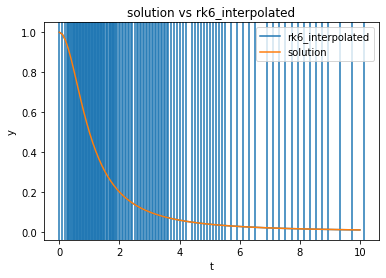

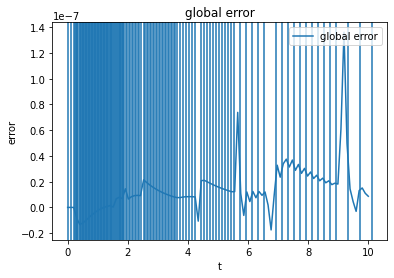

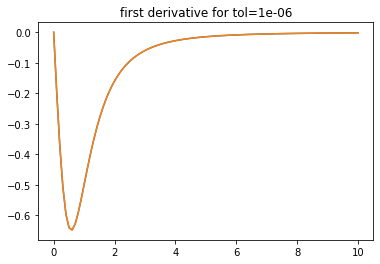

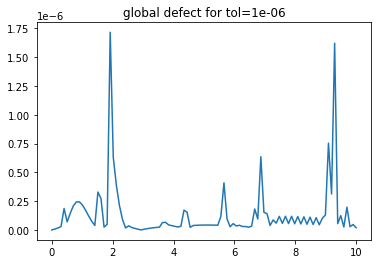

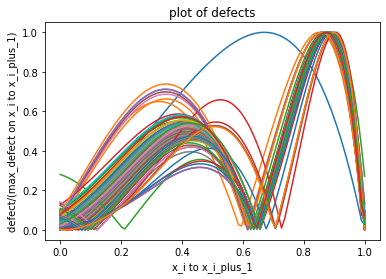

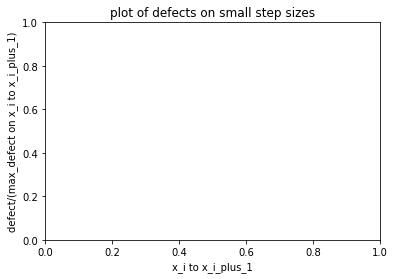

0.0
0.0
0.0
8.478650448395797e-09
8.52165304987551e-09
8.53713832960068e-09
8.520216976393158e-09
8.466888634650616e-09
1.368990421024563e-08
1.3325049064150107e-08
1.2917471980955497e-08
1.2469501875500555e-08
1.1984290670952191e-08
1.1465683069644683e-08
1.0918073667376405e-08
1.0346254075699335e-08
9.755263374877643e-09
9.150244562050602e-09
8.536313100826476e-09
7.918441791154862e-09
7.301362736633621e-09
6.689488962763335e-09
6.086854686948584e-09
5.4970741292237335e-09
4.923316532234878e-09
4.3682966133218315e-09
3.8342772290533844e-09
3.323082919948206e-09
2.836121004712311e-09
2.3744104460377002e-09
1.9386124927578408e-09
1.52906742822978e-09
1.1458288207144562e-09
7.887008823814767e-10
4.5727366337899866e-10
1.509562475021653e-10
1.309905517388188e-10
3.8942599145386225e-10
6.253016437973713e-10
8.396383588404888e-10
1.0335048372667188e-09
1.2079985900470547e-09
1.3642308949179949e-09
1.5033125300156769e-09
1.6263428381790845e-09
1.7343998459651289e-09
1.8285329916878368e-09
1

In [5]:
t_span_2 = [0, 10]
y0_2 = [1]

def model2(t, y):
    return [-2*t*y**2]

def solution2(t):
    return [1/(1+x**2) for x in t]

experiment(model2, y0_2, t_span_2, solution2)

tolerance= 1e-06
Monitor8
alpha values [0.9999999999999998, 1.0, 0.9999999999999989, 0.5000000000000003, 1.0000000000000044]
beta values [0.9999999999999956, 1.0000000000000002, 1.000000000000001, 1.999999999999999, 1.0]
n_steps 50
n_successful_steps 50


Monitor10
alpha values [1.9999999999999984, 2.0000000000000004, 2.0, 1.9999999999999978, 1.0000000000000007, 2.000000000000002, 2.000000000000009, 1.9999999999999911]
beta values [1.9999999999999978, 2.0, 2.0000000000000013, 3.9999999999999956, 2.000000000000002, 2.000000000000009, 1.9999999999999911]
n_steps 0
n_successful_steps 0

integration complete


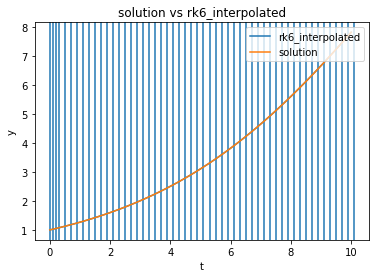

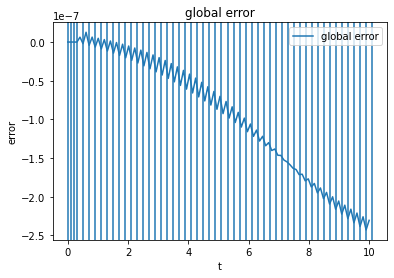

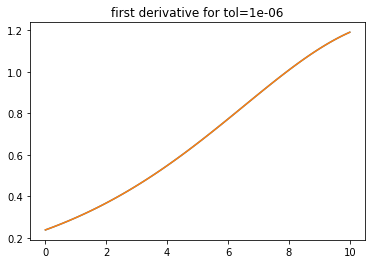

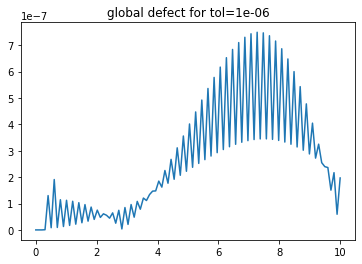

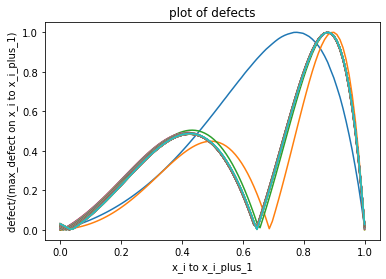

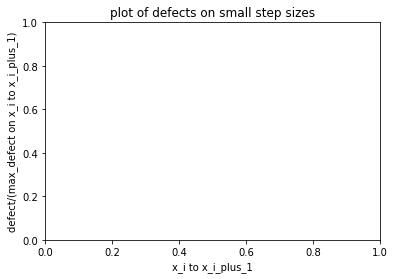

0.0
0.0
0.0
6.177991451750131e-11
2.0726487193201137e-09
4.236402340040968e-09
6.5586416297946926e-09
9.044787141476718e-09
1.1700029389771771e-08
1.4529278224983955e-08
1.753710843210854e-08
2.0727700000833238e-08
2.4104781060074743e-08
2.767156148664185e-08
3.1430671398879895e-08
3.538409321102165e-08
3.953309413162742e-08
4.387815932815897e-08
4.841892664586567e-08
5.315411799600156e-08
5.808148006991587e-08
6.319772261065282e-08
6.849846068135435e-08
7.39781689240715e-08
7.963013715084344e-08
8.544643215202541e-08
9.141787504773902e-08
9.753402308021464e-08
1.0378316250836406e-07
1.101523192659215e-07
1.1662727583683363e-07
1.2319260767057472e-07
1.2983172803515686e-07
1.3652695507460066e-07
1.4325958819227935e-07
1.5000999820102834e-07
1.5675774100998296e-07
1.63481670867327e-07
1.7016008158066143e-07
1.76770853954622e-07
1.8329160589303228e-07
1.896998673700523e-07
1.9597324474318611e-07
2.0208960993528535e-07
2.0802727362934093e-07
2.1376517267412964e-07
2.19283049496255e-07
2.2

In [6]:
t_span_3 = [0, 10]
y0_3 = [1]

def model3(t, y):
    return [(1/4)*y*(1 - y/20)]

def solution3(t):
    return [20 / ( 1 + 19 * exp(-x/4) ) for x in t]

experiment(model3, y0_3, t_span_3, solution3)

In [7]:
t_span_4 = [0, 10]
y0_4 = [0]

def model4(t, y):
    return [100 * (sin(t) - y)]
    # return [10 * (sin(t) - y)]

def solution4(t):
    return [( 100 * ( exp(-100 * x) - cos(x) ) +  10000 * sin(x) ) / 10001 for x in t]
    # return [( 10 * ( exp(-10 * x) - cos(x) ) +  100 * sin(x) ) / 101 for x in t]

experiment(model4, y0_4, t_span_4, solution4)

In [ ]:
t_span_5 = [0, 10]
y0_5 = [2]

def model5(t, y):
    return [(15 * cos(10 * t))/y]

def solution5(t):
    return [sqrt(3*sin(10*x) + 4) for x in t]

experiment(model5, y0_5, t_span_5, solution5)

In [ ]:
t_span_6 = [0, 10]
y0_6 = [1]

def model6(t, y):
    return [-y/(t+1)]

def solution6(t):
    return [1/(x+1) for x in t]

experiment(model6, y0_6, t_span_6, solution6)

In [ ]:
t_span_7 = [0, 10]
y0_7 = [1]

def model7(t, y):
    alpha = 0.1
    return [ -alpha*y - exp(-alpha*t)*sin(t)]

def solution7(t):
    alpha = 0.1
    return [exp(-alpha*x)*cos(x) for x in t]

experiment(model7, y0_7, t_span_7, solution7)

In [ ]:
t_span_11 = [0, 10]
y0_11 = [1]

def model11(t, y):
    return [-2*y + t]

def solution11(t):
    return [1/4 * (-1 + 5 * exp(-2 * x) + 2 * x) for x in t]

experiment(model11, y0_11, t_span_11, solution11)

In [ ]:
# THE PROBLEMS BELOW CANNOT BE DONE YET
# CANNOT BE DONE AS MY CURRENT rk6 does not handle a vector for the ys
### ======================================================================


# Jeff cash test set first one

t_span_8 = [0, 10]
eps = 0.1
a = exp(-1/eps)
y0_8 = [1, a/(eps*(-1+a))]

def model8(t, y):
    return [y[1], y[0]/eps]

def solution8(t):
    # THE experiment method calculates error on "computed[0]"
    # so we can only verify the error of y[0] there
    return [(1-exp(x/eps)*a)/(1-a) for x in t]

experiment(model8, y0_8, t_span_8, solution8)

## the results were extremely bad. So i wanted to see the solution
plt.figure()
plt.plot(t_span_8, solution8(t_span_8))



In [ ]:
# Jeff cash test set second one
t_span_9 = [0, 10]
eps = 0.1
y0_9 = [1, -1/sqrt(eps)]

def model9(t, y):
    return [y[1], (y[0] + y[0]**2 - exp(-2*t/sqrt(eps)))/eps]

def solution9(t):
    # THE experiment method calculates error on "computed[0]"
    # so we can only verify the error of y[0] there
    return [exp(-x/sqrt(eps)) for x in t]

experiment(model9, y0_9, t_span_9, solution9)

In [ ]:
# Wolfram Alpha first problem

t_span_10 = [0, 10]
y0_10 = [1, 2]

def model10(t, y):
    return [y[1], -3*y[0] + 2*cos(4*t)]

def solution10(t):
    # THE experiment method calculates error on "computed[0]"
    # so we can only verify the error of y[0] there
    s = sqrt(3)
    return [(26*s*sin(s*x) - 6*cos(4*x) + 45*cos(s*x))/39 for x in t]

experiment(model10, y0_10, t_span_10, solution10)